#Taller 2 Taller 2 PLN

#Importación de datos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv ('/content/training.1600000.processed.noemoticon.csv', sep = ',', encoding = 'latin-1')

In [ ]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df = df.drop(columns=['ids'])

# Preprocesamiento de Texto

In [ ]:
import nltk
nltk.download('wordnet') # Download the wordnet dataset

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
# Convertir a minúsculas
    text = text.lower()

    # Eliminar contenido entre corchetes
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar puntuación
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Eliminar palabras con números
    text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar caracteres repetidos
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Eliminar palabras muy largas o muy cortas
    text = ' '.join([word for word in text.split() if 2 <= len(word) <= 15])

    # 4. Eliminar stopwords, conservando palabras específicas
    stop_words = set(stopwords.words('english'))
    keep_words = {'what', 'who', 'why', 'when', 'where', 'how', 'not', 'yes'}  # Palabras importantes
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words or word in keep_words])

    # 5. Lematización
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Filtrar palabras que contengan solo letras
    text = ' '.join([word for word in text.split() if word.isalpha()])
    # Filtrar palabras con prefijos anómalos
    text = ' '.join([word for word in text.split() if not word.startswith('aa')])

    return text


In [ ]:
# Aplicar la función al dataframe
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.to_csv('df.csv', index=False)


In [ ]:
df = pd.read_csv('df.csv')


In [ ]:
df[['text','cleaned_text']]

,text,cleaned_text
0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
2,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,"@nationwideclass no, it's not behaving at all....",nationwideclass not behaving im mad why cant see
4,@Kwesidei not the whole crew,kwesidei not whole crew
...,...,...
1048567,My GrandMa is making Dinenr with my Mum,grandma making dinenr mum
1048568,Mid-morning snack time... A bowl of cheese noo...,midmorning snack time bowl cheese noodle yum
1048569,@ShaDeLa same here say it like from the Termi...,shadela say like terminiator movie come like word
1048570,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu


#Análisis Exploratorio

##Creación de Caracteristicas

Creamos columnas adicionales que pueden ayudar a los modelos a conocer más del texto. Por ejemplo la longitud del texto, puede ser relevante por que las personas molestas tienden a escribir más

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df['cleaned_text_length'] = df['cleaned_text'].astype(str).apply(len)  # Longitud del texto
df['text_length'] = df['text'].apply(len)  # Longitud del texto
df['num_exclamations'] = df['text'].str.count('!')  # Exclamaciones
df['num_questions'] = df['text'].str.count('\?')  # Preguntas

In [ ]:
df_num = df.select_dtypes(include=['number'])

##Distribución de Variable objetivo

<Axes: xlabel='target', ylabel='count'>

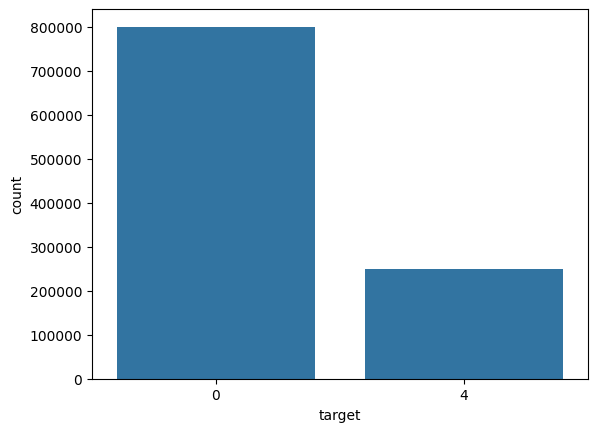

In [ ]:
sns.countplot(data=df, x='target')

##Correlación

<Axes: >

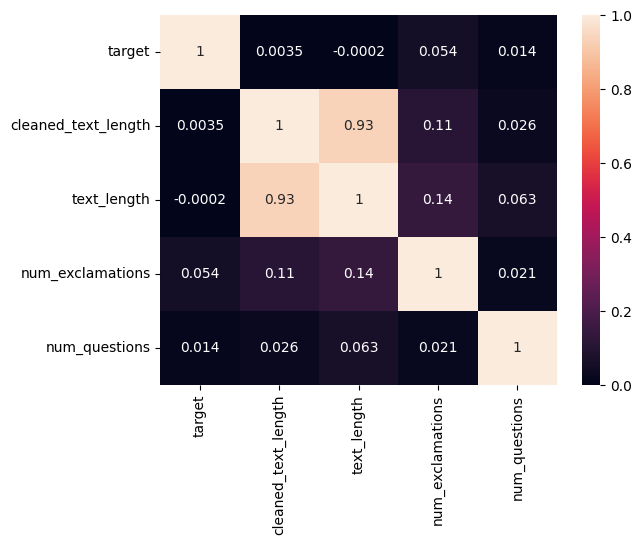

In [ ]:
sns.heatmap(df_num.corr(), annot=True)

##Diagrama de Cajas y Bigotes

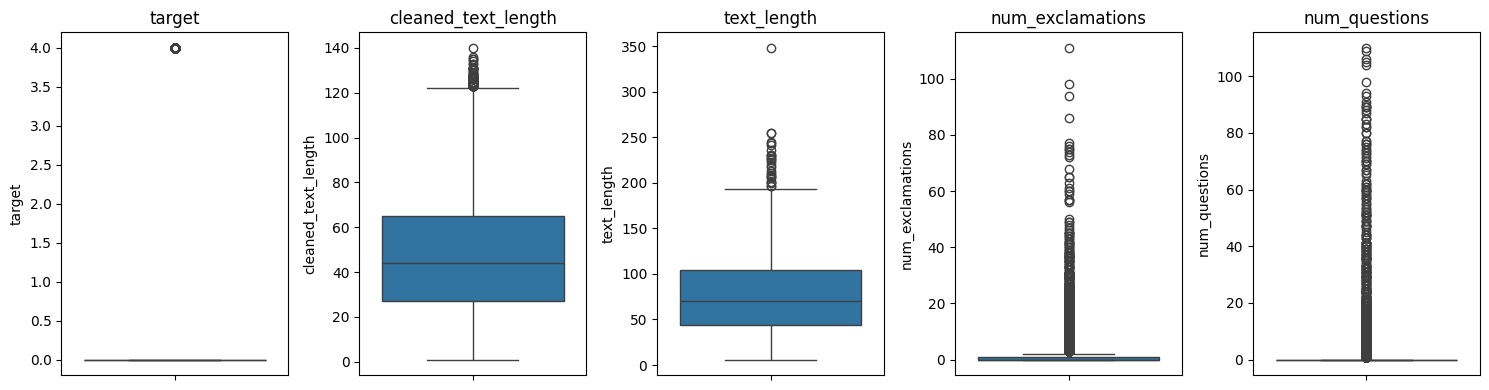

In [ ]:
def graficar_boxplot_seaborn(df,columnas,filas,alto):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, alto))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
      sns.boxplot(df, y = col, ax=axes[i])
      axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

graficar_boxplot_seaborn(df_num,5,1,4)

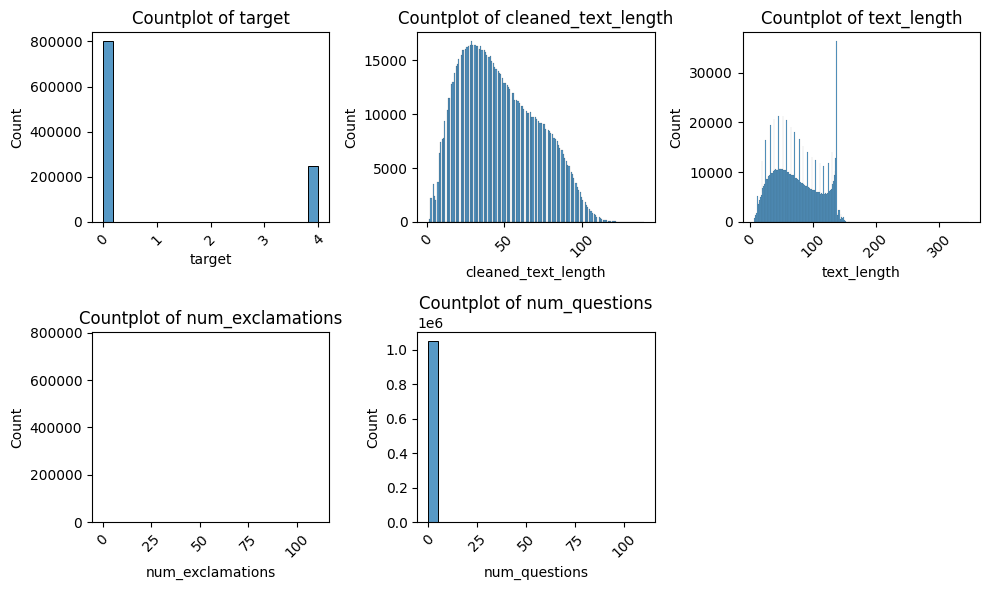

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))  # Ajustar tamaño
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through numerical columns and create countplots
for i, col in enumerate(df_num.columns):
    if i <= len(axes):  # Check if there are enough subplots
        sns.histplot(x=col, data=df_num, ax=axes[i])
        axes[i].set_title(f'Countplot of {col}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x

# Remove any unused subplots
for i in range(len(df_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
#sns.countplot(df_num['num_exclamations'])

In [ ]:
df.isnull().sum()

,0
target,0
date,0
flag,0
user,0
text,0
cleaned_text,933
cleaned_text_length,0
text_length,0
num_exclamations,0
num_questions,0


In [ ]:
df_num.isnull().sum()

,0
target,0
cleaned_text_length,0
text_length,0
num_exclamations,0
num_questions,0


In [ ]:
df.shape

(1048572, 10)

#Preparación de datos para modelar

Borramos columnas innecesarias

In [ ]:
df.drop(columns=[ 'date', 'flag', 'user','text','text_length'], inplace=True)

Convertimos la polaridad objetivo a binaria

In [ ]:
df['target'] = df['target'].replace(4, 1)

Borrar registros nulos

In [ ]:
df.dropna(subset=['cleaned_text'], inplace=True)

In [ ]:
# prompt: usa min max scaler  para escalar estos campos en el df que queden entre 0 y 1
# df[['cleaned_text_length', 'text_length', 'num_exclamations', 'num_questions']]

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
df[['cleaned_text_length', 'num_exclamations', 'num_questions']] = scaler.fit_transform(df[['cleaned_text_length', 'num_exclamations', 'num_questions']])

# Now the specified columns in your DataFrame are scaled between 0 and 1

<Axes: >

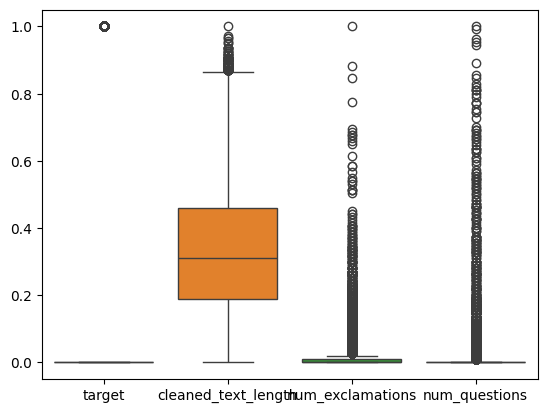

In [ ]:
sns.boxplot(df)

##CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english',max_features=1000, min_df=2, max_df=0.7)
X_count = count_vectorizer.fit_transform(df['cleaned_text'])


In [ ]:
vocabulario = count_vectorizer.get_feature_names_out()
print(vocabulario[:50])

['able' 'absolutely' 'account' 'ache' 'actually' 'adam' 'add' 'afford'
 'afraid' 'afternoon' 'age' 'ago' 'agree' 'ah' 'ahead' 'ahh' 'aint' 'air'
 'airport' 'al' 'album' 'allergy' 'allowed' 'alot' 'alright' 'amazing'
 'amp' 'annoying' 'answer' 'anymore' 'app' 'apparently' 'apple' 'arent'
 'argh' 'arm' 'art' 'ask' 'asked' 'asleep' 'assignment' 'ate' 'australia'
 'available' 'aw' 'awake' 'award' 'away' 'awesome' 'awful']


In [ ]:
# Extraer palabras únicas del vocabulario
words = count_vectorizer.get_feature_names_out()

# Convertir X_count a un DataFrame
X_count_df = pd.DataFrame(X_count.toarray(), columns=words)

In [ ]:
# Sumar frecuencias de cada palabra
word_frequencies = X_count_df.sum().sort_values(ascending=False)

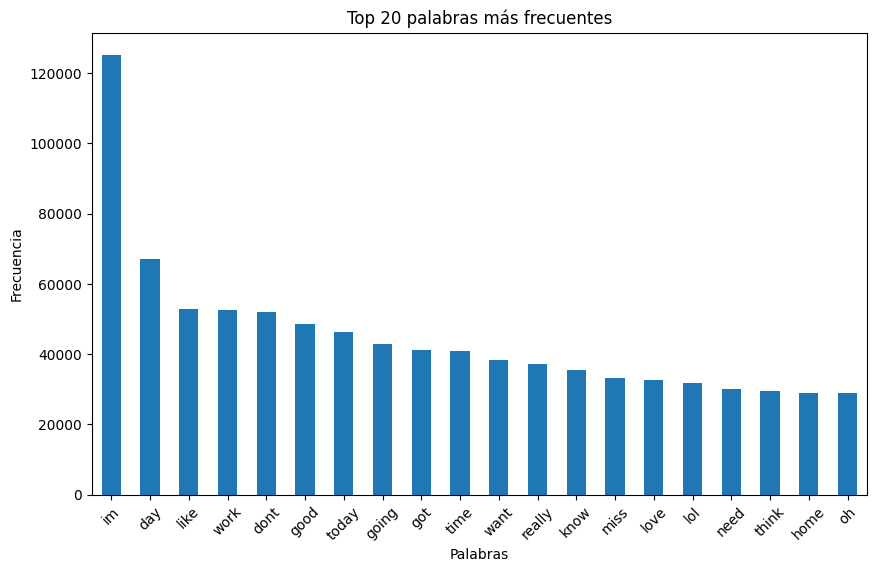

In [ ]:
word_frequencies.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


##TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=1000, min_df=2, max_df=0.7)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])


In [ ]:
vocabulariotfid = vectorizer.get_feature_names_out() # Call the method on the 'vectorizer' object
print(vocabulariotfid[:50])

['able' 'absolutely' 'account' 'ache' 'actually' 'adam' 'add' 'afford'
 'afraid' 'afternoon' 'age' 'ago' 'agree' 'ah' 'ahead' 'ahh' 'aint' 'air'
 'airport' 'al' 'album' 'allergy' 'allowed' 'alot' 'alright' 'amazing'
 'amp' 'annoying' 'answer' 'anymore' 'app' 'apparently' 'apple' 'arent'
 'argh' 'arm' 'art' 'ask' 'asked' 'asleep' 'assignment' 'ate' 'australia'
 'available' 'aw' 'awake' 'award' 'away' 'awesome' 'awful']


In [ ]:
df.shape

(1047639, 5)

In [ ]:
X_count.shape

(1047639, 1000)

In [ ]:
X_tfidf.shape

(1047639, 1000)

In [ ]:
X_tfidf

<1047639x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4280636 stored elements in Compressed Sparse Row format>

In [ ]:
X_count

<1047639x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4280636 stored elements in Compressed Sparse Row format>

Agregamos las columnas del df a las matrices generadas

In [ ]:
from scipy.sparse import csr_matrix, hstack


# Extraemos las columnas numéricas que quieres agregar
additional_columns = df[['cleaned_text_length', 'num_exclamations', 'num_questions']]

# Convertir las columnas numéricas a formato disperso
additional_columns_sparse = csr_matrix(additional_columns.values)

# Ahora combinamos la matriz dispersa X_count con las columnas adicionales
#X_count_combined_sparse = hstack([X_count, additional_columns_sparse])
#X_tfidf_combined_sparse = hstack([X_tfidf, additional_columns_sparse])

# Verifica la forma de la nueva matriz combinada
#print(X_count_combined_sparse.shape)  # Esto muestra el número de filas y columnas en la matriz combinada
#print(X_tfidf_combined_sparse.shape)

In [ ]:
y = df['target']

In [ ]:
y.shape

(1047639,)

#Creación de conjuntos

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# X_tfidf_combined_sparse es la matriz dispersa con las características (X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


#Modelos

##Logistic Regression

In [ ]:

# Crear y entrenar el modelo (por ejemplo, Logistic Regression)
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression(max_iter=1000)
modellr.fit(X_train, y_train)

# Hacer predicciones
y_predlr = modellr.predict(X_test)


In [ ]:
# prompt: genera el informe de resultados de ese modelo

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print(classification_report(y_test, y_predlr))
print(confusion_matrix(y_test, y_predlr))
print(f"Accuracy: {accuracy_score(y_test, y_predlr)}")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89    159956
           1       0.69      0.39      0.50     49572

    accuracy                           0.81    209528
   macro avg       0.76      0.67      0.69    209528
weighted avg       0.80      0.81      0.79    209528

[[151534   8422]
 [ 30445  19127]]
Accuracy: 0.8145021190485281


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Paso 2: Crear el modelo de Naive Bayes
nb_model = MultinomialNB()

# Paso 3: Entrenar el modelo con las características y las etiquetas
nb_model.fit(X_train, y_train)  # O usa X_count_combined_sparse si ese es tu conjunto de datos


MultinomialNB()

In [ ]:
# Hacer predicciones
y_prednb = nb_model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_prednb))
print(confusion_matrix(y_test, y_prednb))
print(f"Accuracy: {accuracy_score(y_test, y_prednb)}")

              precision    recall  f1-score   support

           0       0.80      0.99      0.88    159956
           1       0.81      0.19      0.31     49572

    accuracy                           0.80    209528
   macro avg       0.80      0.59      0.60    209528
weighted avg       0.80      0.80      0.75    209528

[[157731   2225]
 [ 40032   9540]]
Accuracy: 0.7983228971784201


##SVM

In [ ]:
from sklearn.svm import LinearSVC


In [ ]:
# Paso 2: Crear el modelo de Support Vector Machine (SVM)
svm_model = LinearSVC()

# Paso 3: Entrenar el modelo con las características y las etiquetas
svm_model.fit(X_train, y_train)  # O usa X_count_combined_sparse si ese es tu conjunto de datos


LinearSVC()

In [ ]:
# Hacer predicciones
y_predsvm = svm_model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_predsvm))
print(confusion_matrix(y_test, y_predsvm))
print(f"Accuracy: {accuracy_score(y_test, y_predsvm)}")

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    159956
           1       0.71      0.35      0.47     49572

    accuracy                           0.81    209528
   macro avg       0.77      0.65      0.68    209528
weighted avg       0.80      0.81      0.79    209528

[[152797   7159]
 [ 32100  17472]]
Accuracy: 0.8126312473750525


##Red Neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Paso 2: Crear el modelo de la red neuronal
modelrn = Sequential()

# Capa de entrada: La cantidad de nodos será el número de características (columnas en X_train)
modelrn.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta
#modelrn.add(Dense(250, activation='relu'))  # Capa oculta
modelrn.add(Dropout(0.2))  # Dropout para evitar overfitting

# Capa de salida: Un nodo para cada clase en el problema de clasificación
modelrn.add(Dense(len(y_train.unique()), activation='softmax'))  # Si es clasificación multiclase

# Compilación del modelo
modelrn.compile(loss='sparse_categorical_crossentropy',  # Usamos 'sparse_categorical_crossentropy' si las etiquetas son enteros
              optimizer=Adam(learning_rate=0.01),  # Optimizer Adam
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Paso 3: Entrenar el modelo
history = modelrn.fit(X_train, y_train,  # O usa X_count_combined_sparse si ese es tu conjunto de datos
                    epochs=10,  # Puedes cambiar el número de épocas
                    batch_size=500,  # Tamaño del lote
                    validation_split=0.2)  # División de los datos para validación durante el entrenamiento


Epoch 1/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8020 - loss: 0.4312 - val_accuracy: 0.8137 - val_loss: 0.4112
Epoch 2/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8145 - loss: 0.4090 - val_accuracy: 0.8141 - val_loss: 0.4090
Epoch 3/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8187 - loss: 0.4010 - val_accuracy: 0.8155 - val_loss: 0.4066
Epoch 4/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.8227 - loss: 0.3933 - val_accuracy: 0.8149 - val_loss: 0.4074
Epoch 5/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.8238 - loss: 0.3882 - val_accuracy: 0.8160 - val_loss: 0.4095
Epoch 6/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8266 - loss: 0.3829 - val_accuracy: 0.8142 - val_loss: 0.4110
Epoch 7/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8309 - loss: 0.3761 - val_accuracy: 0.8138 - val_loss: 0.4119
Epoch 8/10
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8314 -

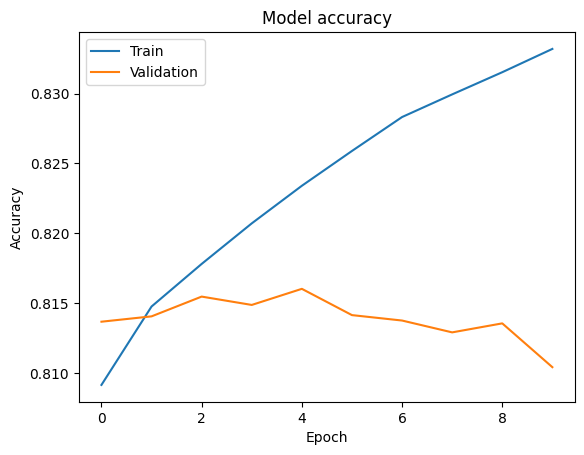

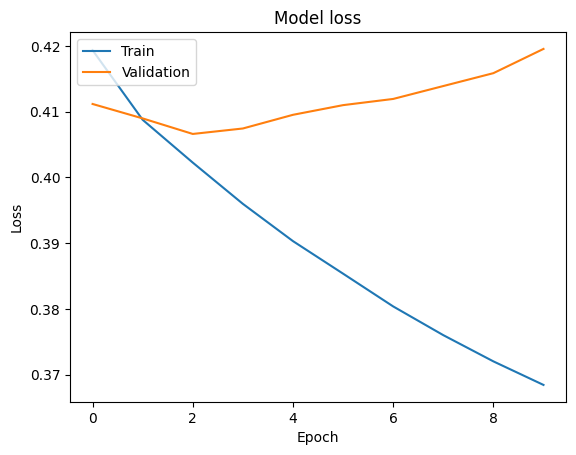

In [ ]:
# prompt: muestrame el histoy de loss de la red neuronal

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Hacer predicciones
y_predsrn = modelrn.predict(X_test)


6548/6548 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


In [ ]:
y_predlr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Hacer predicciones, convirtiendo las probabilidades a etiquetas de clase
y_predsrn = y_predsrn.argmax(axis=1)  # Obtener la clase con mayor probabilidad

# Ahora puedes usar classification_report
print(classification_report(y_test, y_predsrn))
print(confusion_matrix(y_test, y_predsrn))
print(f"Accuracy: {accuracy_score(y_test, y_predsrn)}")

              precision    recall  f1-score   support

           0       0.85      0.92      0.88    159956
           1       0.64      0.46      0.54     49572

    accuracy                           0.81    209528
   macro avg       0.74      0.69      0.71    209528
weighted avg       0.80      0.81      0.80    209528

[[147121  12835]
 [ 26590  22982]]
Accuracy: 0.8118389904929174


#Mejorar modelo LR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define los hiperparámetros y sus valores posibles
#param_grid = {
    'penalty': ['l1', 'l2'],  # Tipos de regularización
    'C': [0.01, 0.1, 1, 10, 100],           # Fuerza de regularización
    'solver': ['saga'],                     # 'saga' soporta 'l1', 'l2' y 'elasticnet'
    'max_iter': [1000]                      # Número de iteraciones máximas
}

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',  # Optimiza el F1 Score
    cv=5,          # Validación cruzada con 5 particiones
    verbose=2,      # Muestra progreso del ajuste
    n_jobs=-1       # Usa todos los núcleos disponibles
)

# Ajusta el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1 Score:", grid_search.best_score_)

# Modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_


IndentationError: unexpected indent (<ipython-input-76-e01bc10e01ca>, line 6)

Resultados de gridsearch(es que tarda mucho en ejecutar) = Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Mejor F1 Score: 0.8127992583673542


In [ ]:
from sklearn.linear_model import LogisticRegression
modellr2 = LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
modellr2.fit(X_train, y_train)



LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
# Hacer predicciones
y_predlr2 = modellr2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predlr2))
print(f"Accuracy: {accuracy_score(y_test, y_predlr2)}")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89    159956
           1       0.69      0.39      0.50     49572

    accuracy                           0.81    209528
   macro avg       0.76      0.67      0.69    209528
weighted avg       0.80      0.81      0.79    209528

Accuracy: 0.8142396242984231


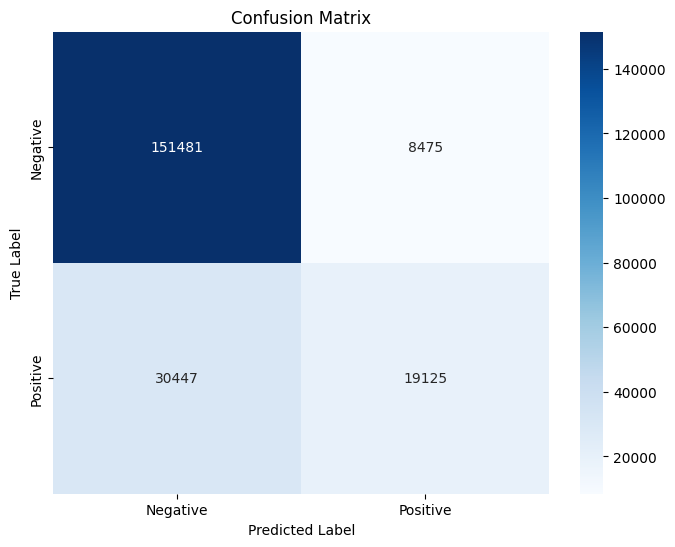

In [ ]:
# prompt: haz una matriz de confusión

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predlr2 are defined from your previous code
cm = confusion_matrix(y_test, y_predlr2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Curva ROC

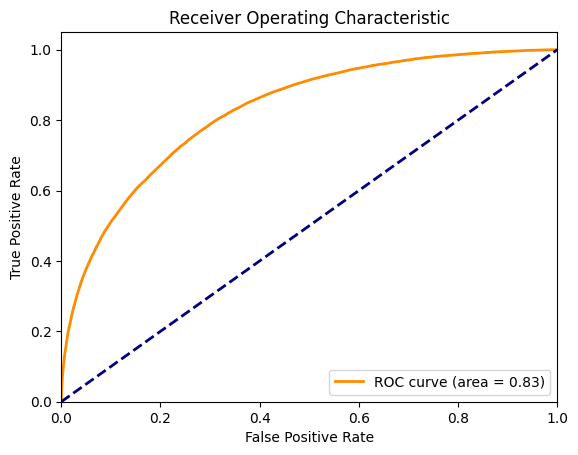

In [ ]:

from sklearn.metrics import roc_curve, auc


y_prob = modellr2.predict_proba(X_test)[:, 1] #probabilidad de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Comprobación

In [ ]:
new_text = "Amazing experience with DEF Ltd! Their team went above and beyond to ensure everything was perfect. Highly recommend! #GreatService #CustomerDelight"


In [ ]:

new_text_cleaned = preprocess_text(new_text)  # Esta es la función que limpia el texto (minúsculas, puntuación, etc.)

new_text_vectorized = vectorizer.transform([new_text_cleaned])  # mismo vectorizador que se uso durante el entrenamiento

prediction = modellr2.predict(new_text_vectorized)
print(new_text)
print(new_text_cleaned)

if prediction[0] == 0:
    print("El texto es negativo")
elif prediction[0] == 1:
    print("El texto es positivo")
else:
    print("Predicción inválida")

Amazing experience with DEF Ltd! Their team went above and beyond to ensure everything was perfect. Highly recommend! #GreatService #CustomerDelight
amazing experience def ltd team went beyond ensure everything perfect highly recommend greatservice customerdelight
El texto es positivo
